# Project - Acquire and Prepare Data from Web

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- This project will focus on Step 1 and 2 (**Acquire** and **Prepare**)
- We will read raw data that needs Data Wrangling to prepare
- The process we follow demonstrates how a Data Scientist works

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd

### Step 1.b: Retrieve/Read the data
- There are two options to get data
#### Option 1: Directly from wikipedia
- Assign variable ```url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"```
- Retrieving the data 
- Assigning the first DataFrame to a variable
   

In [2]:
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"

In [3]:
tables = pd.read_html(url)

In [4]:
type(tables)

list

In [5]:
tables[0].head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step demonstrates how to identify if a numeric column is incorrectly represented as non-numeric.

In [6]:
fundraising = tables[0]

In [7]:
fundraising.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.b: Check for null (missing) values
- Sometimes often is missing entries - for multiple reasons

In [8]:
fundraising.isna().any()

Year            False
Source          False
Revenue         False
Expenses        False
Asset rise      False
Total assets    False
dtype: bool

### Step 2.c: Delete Source Column
- The Column Source adds no value for further investigations

In [9]:
fundraising = tables[0].drop('Source', axis=1)

In [10]:
fundraising.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021/22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


### Step 2.d: Convert Year column to numeric

In [11]:
fundraising['Year'] = fundraising['Year'].str[-2:]
fundraising.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,20,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,19,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,18,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [12]:
fundraising['Year'] = pd.to_numeric(fundraising['Year'])
fundraising.dtypes

Year             int64
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.e: Set Year to index

In [13]:
fundraising.set_index('Year', inplace=True)

In [15]:
fundraising.sort_index(inplace=True)
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
4,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
5,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"
6,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216"
7,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282"
8,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168"


### Step 2.f: Convert the remaining columns to numeric

In [18]:
#fundraising['Revenue'] = pd.to_numeric(fundraising['Revenue'].str[2:].str.replace(',',''))
fundraising['Expenses'] = pd.to_numeric(fundraising['Expenses'].str[2:].str.replace(',',''))
fundraising['Asset rise'] = pd.to_numeric(fundraising['Asset rise'].str[2:].str.replace(',',''))
fundraising['Total assets'] = pd.to_numeric(fundraising['Total assets'].str[2:].str.replace(',',''))


In [19]:
fundraising.dtypes

Revenue         int64
Expenses        int64
Asset rise      int64
Total assets    int64
dtype: object

In [21]:
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
4,80129,23463,56666,56666
5,379088,177670,211418,268084
6,1508039,791907,736132,1004216
7,2734909,2077843,654066,1658282
8,5032981,3540724,3519886,5178168


### Step 2.g: Visualize data to investigate quality

<AxesSubplot:xlabel='Year'>

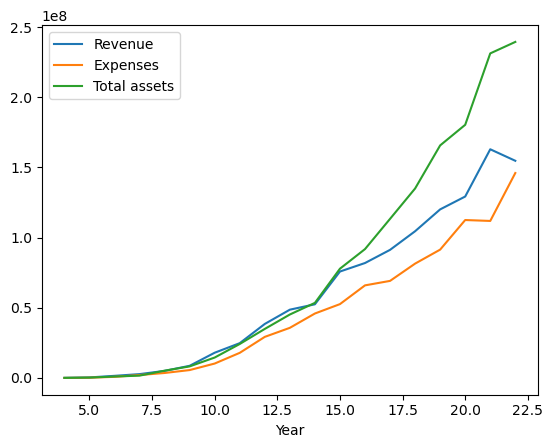

In [22]:
fundraising[['Revenue', 'Expenses', 'Total assets']].plot()

### Step 2.h: Visualize data to investigate quality

<AxesSubplot:xlabel='Year'>

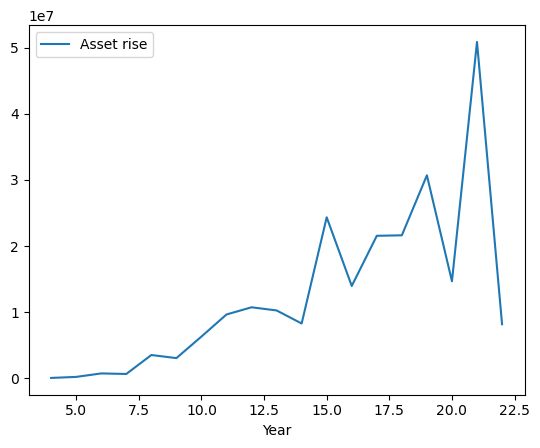

In [23]:
fundraising[['Asset rise']].plot()

Based on an analysis of the graphs, it appears that the revenue has decreased and the expenses have increased around the year 2021. This may have contributed to the significant drop in asset rise that is observed in the above graph. 